In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [16]:
auto_loan_file = "../data/auto_loan_data.csv"
registration_file = "../data/vehicle_registration_data.csv"

# オートローンデータ
auto_loan_df = pd.read_csv(auto_loan_file, encoding='utf-8')
print(f"オートローンデータ形状: {auto_loan_df.shape}")

# 新車登録データ
registration_df = pd.read_csv(registration_file, encoding='utf-8')
print(f"新車登録データ形状: {registration_df.shape}")

オートローンデータ形状: (31655, 21)
新車登録データ形状: (54, 14)


In [17]:
# オートローンデータの日付変換
auto_loan_df['契約年月日'] = pd.to_datetime(auto_loan_df['契約年月日'])

# 新車のみフィルタリング
new_car_loans = auto_loan_df[auto_loan_df['新車/中古車'] == '新車'].copy()

print(f"新車オートローン件数: {len(new_car_loans)}")
new_car_loans

新車オートローン件数: 9083


,契約年月日,新車/中古車,国産車/輸入車,車両区分,ボディタイプ,メーカー,車種名_集約名,車種名,顧客数,件数,...,車輌本体価格,車輌本体価格_税込,諸費用_税込,その他費用_税込,付属品オプション費用_税込,現金価格合計,現金,下取り価格,頭金,残金_クレジット金額
0,2024-01-05,新車,国産車,軽自動車,SUV・ﾋﾟｯｸｱｯﾌﾟ,ｽｽﾞｷ,ﾊｽﾗｰ,ﾊｽﾗｰ,2,2,...,NaN,3040000,170000,130000,190000,3530000,790000,0,790000,2740000
1,2024-01-05,新車,国産車,普通自動車,ﾊﾞﾝ,ﾄﾖﾀ,ﾊｲｴｰｽ,ﾊｲｴｰｽﾊﾞﾝ,2,2,...,6448000.0,7496000,511030,-25110,1259700,9241620,0,0,0,9241620
40,2024-01-09,新車,国産車,軽自動車,SUV・ﾋﾟｯｸｱｯﾌﾟ,ｽｽﾞｷ,ｼﾞﾑﾆｰｼｴﾗ,ｼﾞﾑﾆｰｼｴﾗ,2,2,...,1863400.0,5237500,325968,-13768,340300,5890000,300000,100000,400000,5490000
41,2024-01-09,新車,国産車,軽自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,ﾆｯｻﾝ,ﾙｰｸｽ,ﾙｰｸｽ,2,2,...,4215200.0,4215200,230480,-258686,635936,4822930,304000,68930,372930,4450000
42,2024-01-09,新車,国産車,軽自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,ﾎﾝﾀﾞ,N BOX,N BOX,5,5,...,5473600.0,9217950,586110,-121700,892510,10574870,1050000,146450,1196450,9378420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31590,2024-12-27,新車,国産車,普通自動車,ﾊﾞﾝ,ﾎﾝﾀﾞ,ﾌﾘｰﾄﾞ,ﾌﾘｰﾄﾞ,9,9,...,3206500.0,9396200,642820,-75220,1388700,11352500,3136500,1350000,2986500,6866000
31591,2024-12-27,新車,国産車,普通自動車,SUV・ﾋﾟｯｸｱｯﾌﾟ,ﾏﾂﾀﾞ,CX-3,CX-3,2,2,...,NaN,2565200,313863,-188485,139422,2830000,0,0,0,2830000
31592,2024-12-27,新車,国産車,普通自動車,ﾊﾞﾝ,ﾐﾂﾋﾞｼ,ﾃﾞﾘｶD:5,ﾃﾞﾘｶD:5,2,2,...,NaN,0,0,0,0,0,0,0,0,0
31593,2024-12-27,新車,国産車,普通自動車,ﾊﾞﾝ,ﾐﾂﾋﾞｼ,ﾃﾞﾘｶﾐﾆ,ﾃﾞﾘｶﾐﾆ,2,2,...,NaN,0,0,0,0,0,0,0,0,0


In [18]:
maker_mapping = {
    # 国産メーカー
    'ﾄﾖﾀ': 'トヨタ',
    'ﾆｯｻﾝ': '日産', 
    'ﾎﾝﾀﾞ': 'ホンダ',
    'ﾏﾂﾀﾞ': 'マツダ',
    'ｽｽﾞｷ': 'スズキ',
    'ﾀﾞｲﾊﾂ': 'ダイハツ',
    'ｽﾊﾞﾙ': 'ＳＵＢＡＲＵ',
    'ﾐﾂﾋﾞｼ': '三菱',
    'ｲｽｽﾞ': 'いすゞ',
    'ﾐﾂﾋﾞｼﾌｿｳ': '三菱ふそう',
    
    # 輸入車（すべて「輸入車」にまとめる）
    'ABARTH': '輸入車',
    'Audi': '輸入車', 
    'BMW': '輸入車',
    'BYD': '輸入車',
    'CITROEN': '輸入車',
    'FIAT': '輸入車',
    'JEEP': '輸入車',
    'LOTUS': '輸入車',
    'Land Rover': '輸入車',
    'Mercedes-Benz': '輸入車',
    'PEUGEOT': '輸入車',
    'Renault': '輸入車',
    'Tesla Motors': '輸入車',
    'VOLVO': '輸入車',
    'Volkswagen': '輸入車',
    
    # レクサスはトヨタに統合
    'ﾚｸｻｽ': 'トヨタ',
    'その他': 'その他'
}

# 元のメーカー名を確認
print("元のメーカー名一覧:")
print(sorted(new_car_loans['メーカー'].unique()))

# メーカー名をマッピング
new_car_loans['メーカー'] = new_car_loans['メーカー'].map(maker_mapping)

print("\nマッピング後のメーカー名一覧:")
print(sorted(new_car_loans['メーカー'].dropna().unique()))

new_car_loans = new_car_loans.dropna()

new_car_loans

元のメーカー名一覧:
['ABARTH', 'Audi', 'BMW', 'BYD', 'CITROEN', 'FIAT', 'JEEP', 'LOTUS', 'Land Rover', 'Mercedes-Benz', 'PEUGEOT', 'Renault', 'Tesla Motors', 'VOLVO', 'Volkswagen', 'その他', 'ｲｽｽﾞ', 'ｽｽﾞｷ', 'ｽﾊﾞﾙ', 'ﾀﾞｲﾊﾂ', 'ﾄﾖﾀ', 'ﾆｯｻﾝ', 'ﾎﾝﾀﾞ', 'ﾏﾂﾀﾞ', 'ﾐﾂｵｶ', 'ﾐﾂﾋﾞｼ', 'ﾐﾂﾋﾞｼﾌｿｳ', 'ﾚｸｻｽ']

マッピング後のメーカー名一覧:
['いすゞ', 'その他', 'スズキ', 'ダイハツ', 'トヨタ', 'ホンダ', 'マツダ', '三菱', '三菱ふそう', '日産', '輸入車', 'ＳＵＢＡＲＵ']


,契約年月日,新車/中古車,国産車/輸入車,車両区分,ボディタイプ,メーカー,車種名_集約名,車種名,顧客数,件数,...,車輌本体価格,車輌本体価格_税込,諸費用_税込,その他費用_税込,付属品オプション費用_税込,現金価格合計,現金,下取り価格,頭金,残金_クレジット金額
1,2024-01-05,新車,国産車,普通自動車,ﾊﾞﾝ,トヨタ,ﾊｲｴｰｽ,ﾊｲｴｰｽﾊﾞﾝ,2,2,...,6448000.0,7496000,511030,-25110,1259700,9241620,0,0,0,9241620
40,2024-01-09,新車,国産車,軽自動車,SUV・ﾋﾟｯｸｱｯﾌﾟ,スズキ,ｼﾞﾑﾆｰｼｴﾗ,ｼﾞﾑﾆｰｼｴﾗ,2,2,...,1863400.0,5237500,325968,-13768,340300,5890000,300000,100000,400000,5490000
41,2024-01-09,新車,国産車,軽自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,日産,ﾙｰｸｽ,ﾙｰｸｽ,2,2,...,4215200.0,4215200,230480,-258686,635936,4822930,304000,68930,372930,4450000
42,2024-01-09,新車,国産車,軽自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,ホンダ,N BOX,N BOX,5,5,...,5473600.0,9217950,586110,-121700,892510,10574870,1050000,146450,1196450,9378420
131,2024-01-10,新車,国産車,普通自動車,ﾊﾞﾝ,トヨタ,ﾊｲｴｰｽ,ﾊｲｴｰｽﾊﾞﾝ,3,3,...,12043000.0,12879500,804480,-997507,2388287,15074760,0,250000,250000,14824760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31583,2024-12-27,新車,国産車,普通自動車,ﾊﾞﾝ,日産,ｾﾚﾅ,ｾﾚﾅ,7,7,...,3548600.0,7278700,280330,-529474,2020444,9050000,3140000,0,3140000,5910000
31584,2024-12-27,新車,国産車,軽自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,日産,ﾃﾞｲｽﾞ,ﾃﾞｲｽﾞ,5,5,...,2956800.0,6226881,845349,-62050,1439820,8450000,0,330000,330000,8120000
31586,2024-12-27,新車,国産車,軽自動車,ｺﾝﾊﾟｸﾄｶｰ・ﾊｯﾁﾊﾞｯｸ,ホンダ,N BOX,N BOX,32,32,...,29731900.0,17583800,991354,-151075,3344721,21768800,0,130000,130000,21638800
31588,2024-12-27,新車,国産車,普通自動車,SUV・ﾋﾟｯｸｱｯﾌﾟ,ホンダ,ｳﾞｪｾﾞﾙ,ｳﾞｪｾﾞﾙ,14,14,...,3198800.0,6735340,275974,3900,617060,7632274,160000,212274,372274,7260000


In [19]:
# メーカー別に各日の件数を合計する
auto_loan_monthly = new_car_loans.groupby(['契約年月日', 'メーカー']).agg({
    '件数': 'sum',
}).reset_index()

# 月次に変換
auto_loan_monthly['年月'] = auto_loan_monthly['契約年月日'].dt.to_period('M')
auto_loan_monthly = auto_loan_monthly.groupby(['年月', 'メーカー']).agg({
    '件数': 'sum',
}).reset_index()

auto_loan_monthly

,年月,メーカー,件数
0,2024-01,スズキ,161
1,2024-01,ダイハツ,35
2,2024-01,トヨタ,121
3,2024-01,ホンダ,63
4,2024-01,マツダ,31
...,...,...,...
112,2024-12,マツダ,99
113,2024-12,三菱,66
114,2024-12,日産,278
115,2024-12,輸入車,20


In [20]:
registration_df['年月'] = pd.to_datetime(registration_df['年月'])
registration_melted = registration_df.melt(
    id_vars=['年月'], 
    var_name='メーカー', 
    value_name='登録台数'
)

registration_melted.head()

,年月,メーカー,登録台数
0,2021-01-01,UDトラックス,349.0
1,2021-02-01,UDトラックス,561.0
2,2021-03-01,UDトラックス,1345.0
3,2021-04-01,UDトラックス,504.0
4,2021-05-01,UDトラックス,583.0


In [21]:
# 年月の型を統一（両方ともPeriod型に変換）
auto_loan_monthly['年月'] = auto_loan_monthly['年月'].astype(str)
registration_melted['年月'] = registration_melted['年月'].dt.to_period('M').astype(str)

# merge
merged_df = pd.merge(auto_loan_monthly, registration_melted, on=['年月', 'メーカー'], how='inner')
print(f"\nマージ後のデータ数: {len(merged_df)}")
merged_df


マージ後のデータ数: 106


,年月,メーカー,件数,登録台数
0,2024-01,スズキ,161,10889.0
1,2024-01,ダイハツ,35,873.0
2,2024-01,トヨタ,121,109375.0
3,2024-01,ホンダ,63,27864.0
4,2024-01,マツダ,31,6968.0
...,...,...,...,...
101,2024-12,マツダ,99,7049.0
102,2024-12,三菱,66,4013.0
103,2024-12,日産,278,18216.0
104,2024-12,輸入車,20,30863.0


In [22]:
auto_loan_makers = set(auto_loan_monthly['メーカー'].dropna().unique())
registration_makers = set(registration_melted['メーカー'].dropna().unique())
common_makers = auto_loan_makers.intersection(registration_makers)

print(f"オートローンメーカー: {sorted(auto_loan_makers)}")
print(f"新車登録メーカー: {sorted(registration_makers)}")
print(f"共通メーカー: {sorted(common_makers)}")

オートローンメーカー: ['その他', 'スズキ', 'ダイハツ', 'トヨタ', 'ホンダ', 'マツダ', '三菱', '日産', '輸入車', 'ＳＵＢＡＲＵ']
新車登録メーカー: ['UDトラックス', 'いすゞ', 'スズキ', 'ダイハツ', 'トヨタ', 'ホンダ', 'マツダ', '三菱', '三菱ふそう', '日産', '日野', '輸入車', 'ＳＵＢＡＲＵ']
共通メーカー: ['スズキ', 'ダイハツ', 'トヨタ', 'ホンダ', 'マツダ', '三菱', '日産', '輸入車', 'ＳＵＢＡＲＵ']


メーカー: 日産, adjust_factor: 101.14
メーカー: ダイハツ, adjust_factor: 2.63
メーカー: マツダ, adjust_factor: 97.58
メーカー: スズキ, adjust_factor: 7.78
メーカー: 三菱, adjust_factor: 70.93
メーカー: ホンダ, adjust_factor: 68.53
メーカー: 輸入車, adjust_factor: 576.96
メーカー: ＳＵＢＡＲＵ, adjust_factor: 1098.88
メーカー: トヨタ, adjust_factor: 332.46


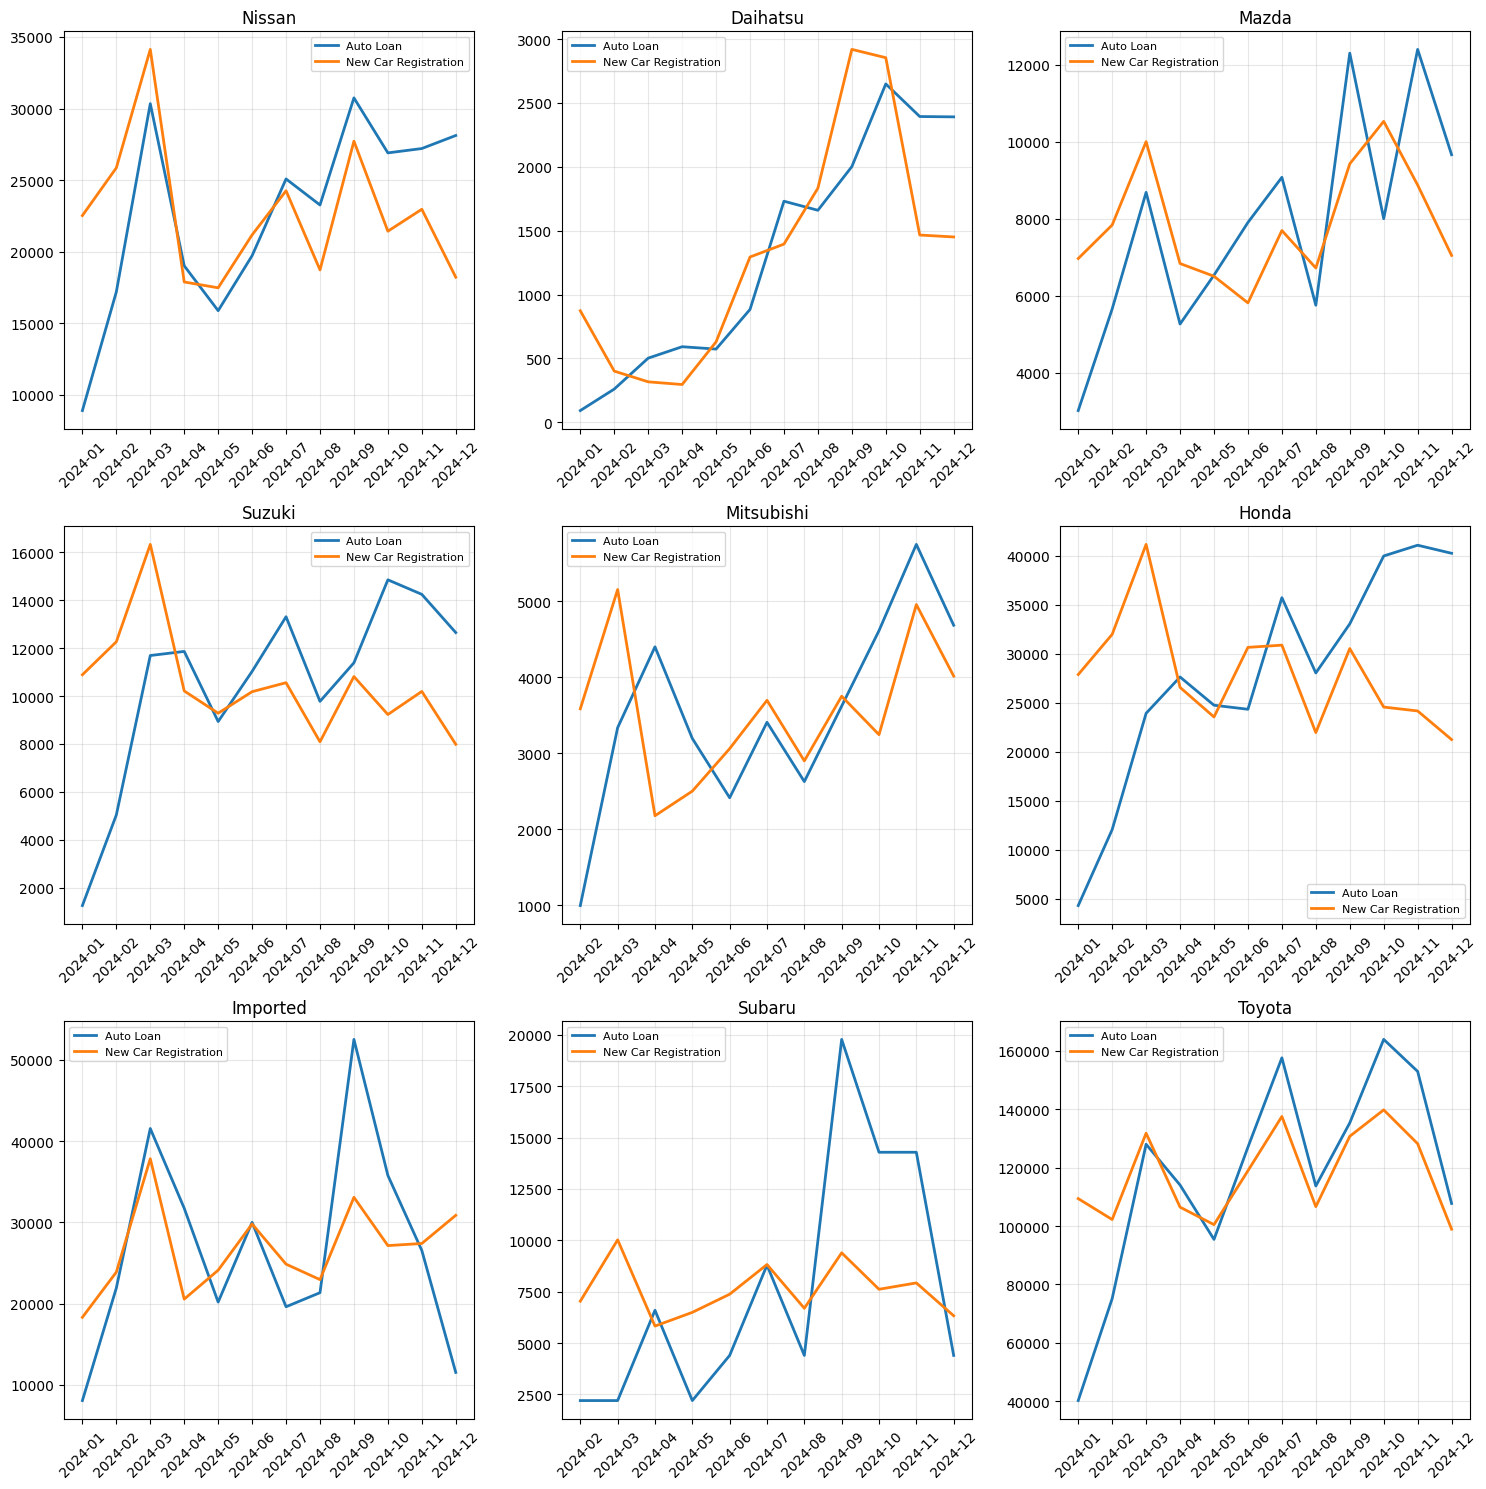

In [23]:
# 時系列の可視化を、全メーカーで一枚のグラフにn分割して表示
n_makers = len(common_makers)
n_cols = 3  # 1行あたりの列数
n_rows = (n_makers + n_cols - 1) // n_cols  # 必要な行数を計算

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
elif n_cols == 1:
    axes = axes.reshape(-1, 1)

maker_english_name = {
    'いすゞ': 'Isuzu',
    'スズキ': 'Suzuki',
    'ダイハツ': 'Daihatsu',
    'トヨタ': 'Toyota',
    'ホンダ': 'Honda',
    'マツダ': 'Mazda',
    '三菱': 'Mitsubishi',
    '三菱ふそう': 'Mitsubishi Fuso',
    '日産': 'Nissan',
    '輸入車': 'Imported',
    'ＳＵＢＡＲＵ': 'Subaru'
}

# 各メーカーのプロット
for i, maker in enumerate(common_makers):
    row = i // n_cols
    col = i % n_cols
    
    # adjust factorを、各メーカーの件数と登録台数の平均値の比率にする
    adjust_factor = merged_df[merged_df['メーカー'] == maker]['登録台数'].mean() / merged_df[merged_df['メーカー'] == maker]['件数'].mean()
    print(f"メーカー: {maker}, adjust_factor: {adjust_factor:.2f}")
    
    merged_df_maker = merged_df[merged_df['メーカー'] == maker]
    
    # 英語名を取得
    english_name = maker_english_name.get(maker, maker)
    
    axes[row, col].plot(merged_df_maker['年月'], merged_df_maker['件数']*adjust_factor, 
                        label='Auto Loan', linewidth=2)
    axes[row, col].plot(merged_df_maker['年月'], merged_df_maker['登録台数'], 
                        label='New Car Registration', linewidth=2)
    axes[row, col].set_title(f'{english_name}', fontsize=12)
    axes[row, col].legend(fontsize=8)
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].tick_params(axis='x', rotation=45)

# 空のサブプロットを非表示にする
for i in range(n_makers, n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()


In [24]:
def calculate_correlation_with_lags(auto_data, reg_data, max_lag=12):
    """
    オートローンデータと新車登録データの時差相関を計算
    """
    correlations = {}
    
    for lag in range(0, max_lag + 1):
        # オートローンデータをlag期間前にシフト
        shifted_auto = auto_data.shift(lag)
        
        # 有効なデータ期間で相関計算
        valid_mask = ~(shifted_auto.isna() | reg_data.isna())
        if valid_mask.sum() > 10:  # 最低10期間のデータが必要
            corr = shifted_auto[valid_mask].corr(reg_data[valid_mask])
            correlations[lag] = corr
        else:
            correlations[lag] = np.nan
    
    return correlations


In [25]:
results = []

# 共通期間の特定（2024年のデータが両方にある期間）
common_period = pd.date_range('2024-01-01', '2024-12-31', freq='MS')

for maker in common_makers:
    print(f"\n--- {maker} の分析 ---")

    correlations = calculate_correlation_with_lags(
        merged_df[merged_df['メーカー'] == maker]['件数'], 
        merged_df[merged_df['メーカー'] == maker]['登録台数'], 
        max_lag=6
    )

    valid_corrs = {k: v for k, v in correlations.items() if not np.isnan(v)}
        
    if valid_corrs:
        best_lag = max(valid_corrs, key=valid_corrs.get)
        best_corr = valid_corrs[best_lag]
        
        results.append({
            'メーカー': maker,
            '最適ラグ（月）': best_lag,
            '最大相関': best_corr,
            '同期相関': correlations.get(0, np.nan),
            'データ期間': f"{merged_df[merged_df['メーカー'] == maker].index.min().strftime('%Y-%m')} - {merged_df[merged_df['メーカー'] == maker].index.max().strftime('%Y-%m')}"
        })
        
        print(f"最適ラグ: {best_lag}ヶ月")
        print(f"最大相関: {best_corr:.3f}")
        print(f"同期相関: {correlations.get(0, np.nan):.3f}")



--- 日産 の分析 ---


AttributeError: 'numpy.int64' object has no attribute 'strftime'